**<font color='red'>Change the name from assignment_lastname to include YOUR last name</font>**. This will make sure that the assignment doesn't get overwritten when you do a git pull in class. 

# Homework 6 - Plotting Practice

## Due: Nov. 6th

Skills: Plotting, reading in data files

Always start with your import statement!

In [1]:
import numpy as np
import pandas as pd #You need this to read in the data file from the paper
import matplotlib.pyplot as plt #You need this to be able to plot!

#This line is key if you want your plots to show up in the Jupyter notebook!
%matplotlib inline

### For your last coding homework, you will be reading in a data file from the [paper you read for part A](https://drive.google.com/file/d/1AhTQV3rVOFa10nBEtm8XZBsXBPDoEFRH/view?usp=sharing) of homework 5 and working to recreate some of the plots in Figure 1. Please refer back to the notebook we worked on in class with plotting examples!

Read in the data file using the **pandas** module that was used to create the plots in Figure 1:

In [2]:
data = pd.read_csv('../data/terrazas.txt', delimiter='\t', comment='#')
data.head()

,Name,M_*,SFR,M_BH,MBH Error,Method
0,Centaurus A,10.904,0.213,7.755,0.084,star
1,Circinus,10.200,-0.010,6.057,0.105,maser
2,IC 1459,11.381,-0.611,9.394,0.079,star
3,IC 4296,11.567,-0.753,9.114,0.073,gas
4,M31,10.731,-0.519,8.155,0.161,star


### (not so) Quick aside on the **pandas** module (semi-optional)

**pandas** is a widely used python module is used to read and manipulate tabular data, e.g. spreadsheets. We may or may not have covered this in class, but optional lesson notebook 8 is on working with data and pandas. To use pandas, we need to first import it by running ```import pandas as pd```, which was done in the first code cell. 

After importing, we can then use all of the pandas functions by running ```pd.function_name``` replacing *function_name* with the function to use. An important function in pandas is ```pd.read_csv``` which will take the path to the data file (i.e. spreadsheet) given as the first argument, and turn that spreadsheet into a pandas *DataFrame*, which is pandas' version of a spreasheet. 

In the cell above, we run

```data = pd.read_csv('../data/terrazas.txt', delimiter='\t', comment='#')```

Which reads in the galaxy data and turns it into a DataFrame. Let's look at the DataFrame by running

```data.head()```
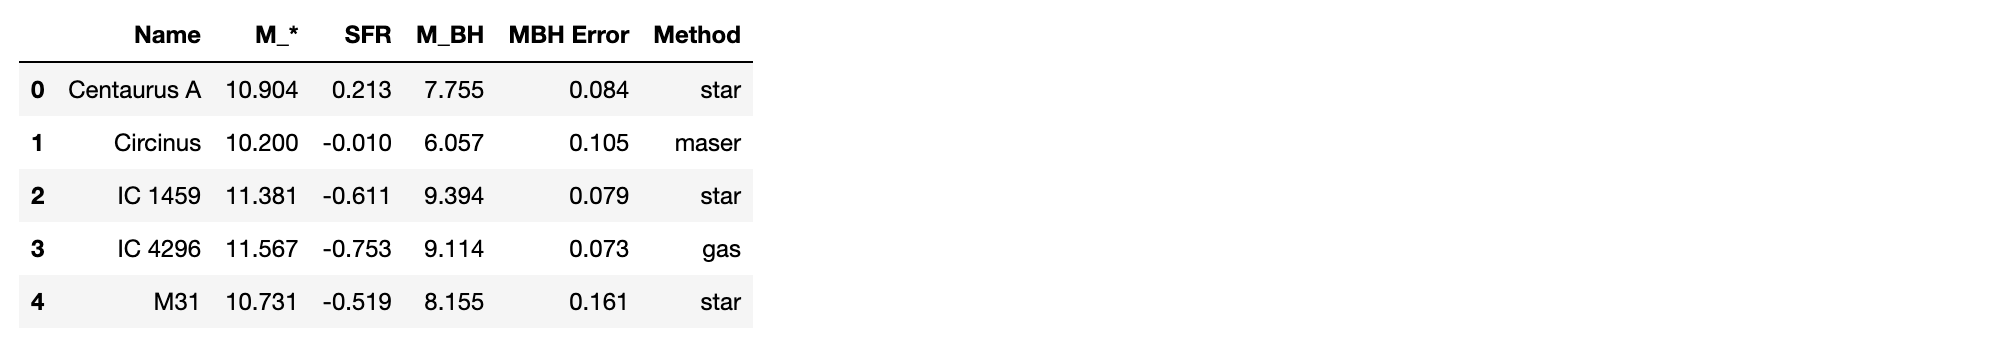

This displays the first 5 rows of the data, which gives you a sense of what's present.

To get a single column (e.g. the name column), you can run

```data['Name']```


You can slice the DataFrame with indices similarly to a numpy array. To get a single row (e.g. the first), you can run 

```data.iloc[0]```

You can also get multiple rows using either a start and stop:

```data.iloc[2:6]``` 

which will return rows with indices 2, 3, 4, 5, 6. Or by using an array of bools:

```
method_is_star = data['method'] == 'star'
star_rows = data.loc[method_is_star]
```

Finally, you may notice that the returned slices look something like this:
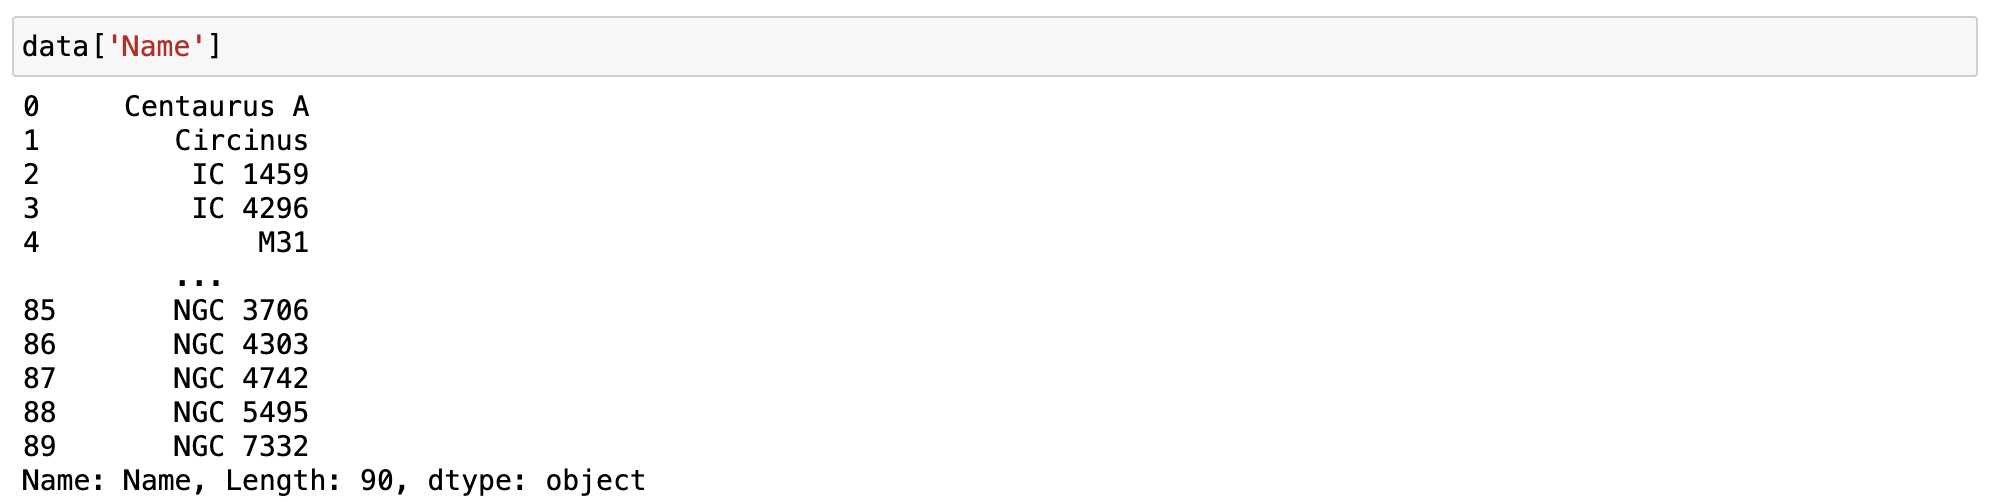

The type of the object returned is a pd.Series object. I won't say too much more about Series, other than that you can turn a Series into a numpy array by adding ```.value``` to the end of the series:

```
galaxy_masses = data['M_*'] # this is a series
galaxy_masses_array = galaxy_masses.value
```

If you would like to see more examples with pandas, I'd recommend either this [tutorial](https://www.datacamp.com/tutorial/pandas) which has lots of code with explanations.

### Play around with the data here
To check out what your data file looks like, you can execute the cell below to see the first three lines. Play around to try to display the first ten lines, lines 20-30, and the last three lines (*Hint: to display the last line, you would type data.iloc[:-1]* )

In [3]:
data.iloc[2:6]

,Name,M_*,SFR,M_BH,MBH Error,Method
2,IC 1459,11.381,-0.611,9.394,0.079,star
3,IC 4296,11.567,-0.753,9.114,0.073,gas
4,M31,10.731,-0.519,8.155,0.161,star
5,M66,10.840,0.536,6.929,0.048,star


To work with individual columns from a data table, you can call them by their names. Execute the cell below to check out only the `'Name'` column from the data table.

In [4]:
data['Name'].values

array(['Centaurus A', 'Circinus', 'IC 1459', 'IC 4296', 'M31', 'M66',
       'M81', 'M87', 'NGC 0307', 'NGC 0524', 'NGC 0821', 'NGC 1023',
       'NGC 1068', 'NGC 1194', 'NGC 1316', 'NGC 1332', 'NGC 1398',
       'NGC 1399', 'NGC 1407', 'NGC 1550', 'NGC 2273', 'NGC 2549',
       'NGC 2787', 'NGC 2960', 'NGC 2974', 'NGC 3079', 'NGC 3115',
       'NGC 3227', 'NGC 3245', 'NGC 3368', 'NGC 3393', 'NGC 3414',
       'NGC 3585', 'NGC 3607', 'NGC 3842', 'NGC 3923', 'NGC 3998',
       'NGC 4151', 'NGC 4258', 'NGC 4261', 'NGC 4291', 'NGC 4472',
       'NGC 4594', 'NGC 4697', 'NGC 4699', 'NGC 4736', 'NGC 4826',
       'NGC 4889', 'NGC 5018', 'NGC 5077', 'NGC 5328', 'NGC 5419',
       'NGC 5846', 'NGC 6086', 'NGC 6251', 'NGC 7052', 'NGC 7457',
       'NGC 7582', 'NGC 7619', 'NGC 7768', 'UGC 3789', '3C120', 'Ark 120',
       'IC 1481', 'Mrk 110', 'Mrk 279', 'Mrk 290', 'Mrk 335', 'Mrk 509',
       'Mrk 590', 'Mrk 79', 'Mrk 817', 'NGC 1600', 'NGC 3516', 'NGC 3783',
       'NGC 4253', 'NGC 4593', 'NGC

## Exercises

**1)** Display only the **last** 10 lines of the `'M_BH'` column.

In [5]:
data['M_BH'][-10:].values

array([7.02, 6.94, 8.14, 8.98, 8.76, 9.77, 6.51, 7.1 , 7.08, 7.08])

**2)** In the cell below, fill in the correct arguments the `ax.scatter` function to make a scatter plot of the stellar mass `'M_*'` and the star formation rate `'SFR'`. (Note: you can plot pd.Series against each other, or you can use ```.values``` to get the numpy arrays)

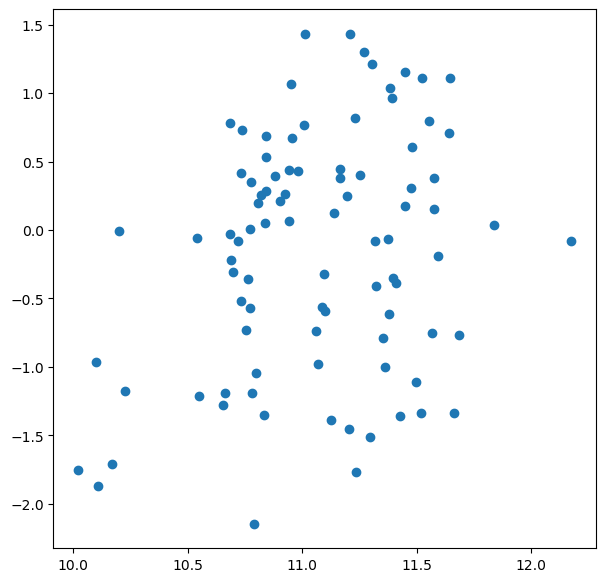

In [6]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(data['M_*'], data['SFR'])

**3)** Copy your code to create the scatter plot from the previous question and add X and Y axis labels. Increase the font size of your axis labels to size 18.

Text(0, 0.5, 'SFR')

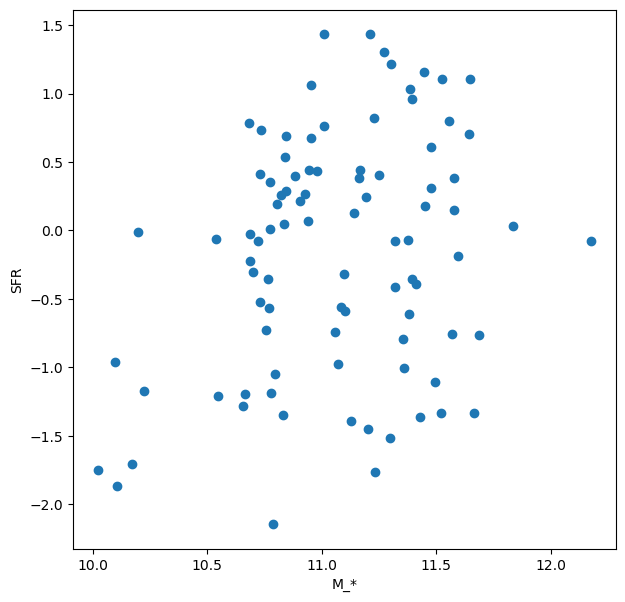

In [7]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(data['M_*'],data['SFR'])
plt.xlabel('M_*')
plt.ylabel('SFR')

# can also use ax.set_xlabel and ax.set_ylabel
# ax.set_xlabel('M_*')
# ax.set_ylabel('SFR')

**4)** You can also make scatter plots with the `plot` command. Figure out how to make a scatter plot that looks like the one you made with `scatter` using the `plot` command. I suggest checking out this [plot gallery](https://matplotlib.org/stable/gallery/index.html) from the `matplotlib` creators. If you click a plot, you will see code that shows how the plot was made. There is a nice scatter plot on the top row that was made with the `plot` command. There are a ton of these plot galleries online and it is a great way to figure out how to make a new plot!

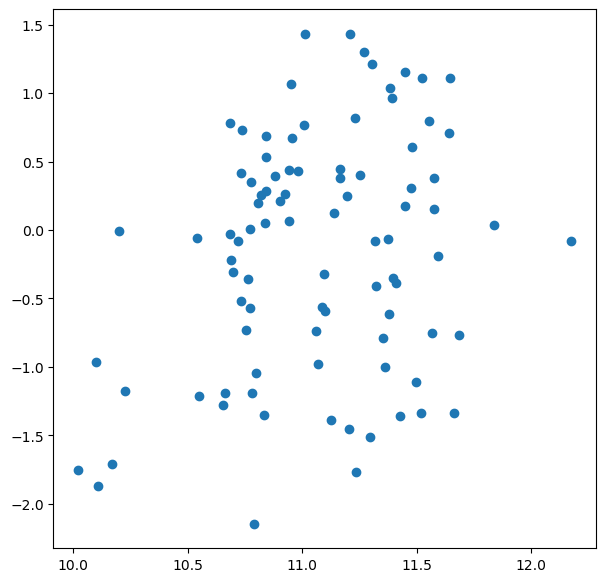

In [8]:
fig, ax = plt.subplots(figsize=(7,7))
#Hint: you'll need one more item inside the function call to get points instead of lines. 
#Check out the last item in the function call in the example in the plot gallery linked above
ax.plot(data['M_*'],data['SFR'], 'o')

### Adding colors and labels

It can be helpful to color code certain points on a plot to understand where certain types of objects lie on your diagram. You can create masks/boolean arrays to select certain types of points. For example, if I wanted to select all of the galaxies in `data` that have black holes measured with the method `star`, I would type:<br>

In [9]:
star = (data['Method'] == 'star')
print(star)

0      True
1     False
2      True
3     False
4      True
      ...  
85     True
86    False
87     True
88    False
89     True
Name: Method, Length: 90, dtype: bool


`star` is a mask/boolean array: an array of `True` and `False` that is the same length as the full `data` array. The value of `star` is `True` where the `Method` column value is `star` and `False` where it is not. You can select rows from the array where `star` is `True` using the following command:

In [10]:
data[star]

,Name,M_*,SFR,M_BH,MBH Error,Method
0,Centaurus A,10.904,0.213,7.755,0.084,star
2,IC 1459,11.381,-0.611,9.394,0.079,star
4,M31,10.731,-0.519,8.155,0.161,star
5,M66,10.840,0.536,6.929,0.048,star
7,M87,11.519,-1.335,9.789,0.031,star
8,NGC 0307,10.772,-0.567,8.602,0.060,star
9,NGC 0524,11.086,-0.559,8.938,0.053,star
10,NGC 0821,10.779,-1.189,8.217,0.210,star
11,NGC 1023,10.756,-0.730,7.616,0.055,star
14,NGC 1316,11.594,-0.187,8.176,0.254,star


If you just want to plot out the values in the `SFR` column for the galaxies with `Method = star`, you could type:

In [11]:
data[star]['SFR']

0     0.213
2    -0.611
4    -0.519
5     0.536
7    -1.335
8    -0.567
9    -0.559
10   -1.189
11   -0.730
14   -0.187
15   -0.739
16   -0.067
17   -1.513
18   -1.110
19   -0.588
21   -1.706
24   -0.791
26   -2.146
27    0.398
29   -0.222
31   -1.047
32   -1.391
33   -0.319
34    0.382
35   -1.766
36   -1.210
37    0.051
40   -1.193
41   -1.337
42   -0.412
43   -1.349
44    0.125
45   -0.061
46    0.009
47    0.034
48   -0.080
50   -0.390
51   -0.767
52   -1.453
53    0.310
56   -1.869
58   -0.353
59    0.151
72   -0.077
85   -1.002
87   -1.175
89   -1.279
Name: SFR, dtype: float64

To find out the total unique values in an array, you can use the `np.unique` function. Execute the cell below to see the unique values in the `Method` column:

In [12]:
print(np.unique(data['Method']))

['CO' 'RM' 'gas' 'maser' 'star' 'star, gas']


**5)** Create a scatter plot with the stellar mass on the X-axis and the black hole mass on the Y-axis (using either the `scatter` or `plot` command, whichever you prefer) where the points are color coded by their measurement method. Make sure to add a label for each set of points and include a legend on your plot. *Make sure to label your axes!*

**<font color='red'>Duplicate of question below</font>**

**6)** Recreate the scatter plot above, but color code each point by that point's measurement method. Make sure to add a label for each set of points and include a legend on your plot. *Make sure to label your axes!*

There are six measurement methods: star, CO, RM, gas, maser, and star_gas.

Choose either a or b, depending on your comfort level with for loops.

**a)** without using a for loop

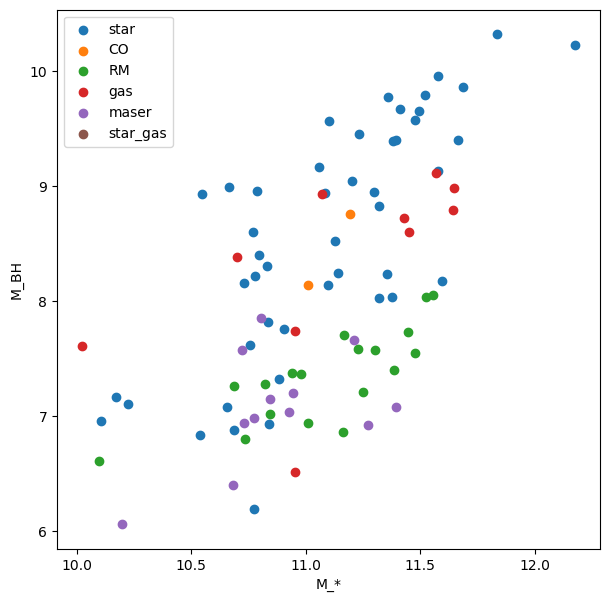

In [13]:
fig,ax=plt.subplots(figsize=(7,7))

# Define six different masking arrays that say whether a particular detection method was used
star_mask = data['Method'] == 'star'
CO_mask = data['Method'] == 'CO'
RM_mask = data['Method'] == 'RM'
gas_mask = data['Method'] == 'gas'
maser_mask = data['Method'] == 'maser'
star_gas_mask = data['Method'] == 'star_gas'

#Plot each type of point below:
#You will need six ax.scatter calls, one for each measurement type
ax.scatter(data[star_mask]['M_*'], data[star_mask]['M_BH'], label='star')
ax.scatter(data[CO_mask]['M_*'], data[CO_mask]['M_BH'], label='CO')
ax.scatter(data[RM_mask]['M_*'], data[RM_mask]['M_BH'], label='RM')
ax.scatter(data[gas_mask]['M_*'], data[gas_mask]['M_BH'], label='gas')
ax.scatter(data[maser_mask]['M_*'], data[maser_mask]['M_BH'], label='maser')
ax.scatter(data[star_gas_mask]['M_*'], data[star_gas_mask]['M_BH'], label='star_gas')

#Don't forget to include axis labels
plt.xlabel('M_*')
plt.ylabel('M_BH')

#Include the command to display the legend
plt.legend()

**b)** with a for loop

star
CO
RM
gas
maser
star_gas


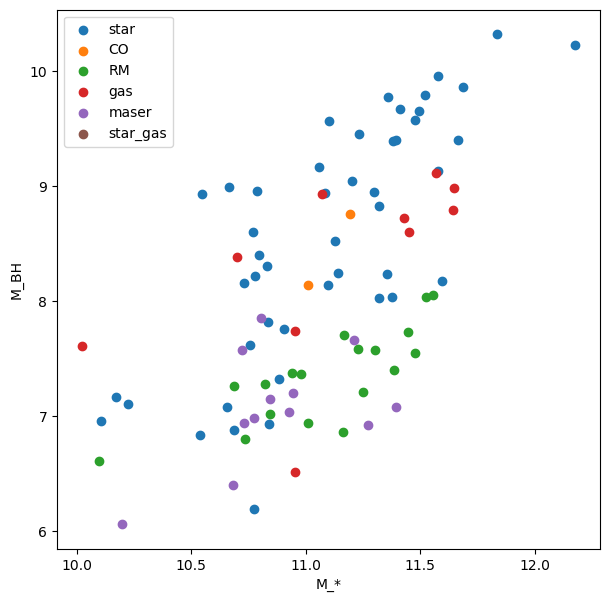

In [14]:
measurement_methods = ['star', 'CO', 'RM', 'gas', 'maser', 'star_gas']

fig,ax=plt.subplots(figsize=(7,7))

for method in measurement_methods:
    print(method) # print out method (you can comment out or delete this line)
    
    # Define a masking array for the measurement method currently set to method
    mask = data['Method'] == method
    
    # Use ax.scatter to plot the points for the this method
    ax.scatter(data[mask]['M_*'], data[mask]['M_BH'], label=method)
    
# Add axis labels and legend
plt.xlabel('M_*')
plt.ylabel('M_BH')

plt.legend()

**Optional Challenge** (this doesn't count for anything, but it's here if you want to do it):<br>
<br>
Create a scatter plot that looks like the first plot in Figure 1 from the paper. Plot SFR/$M_{*}$ on the Y-axis and $M_{*}$ on the X-axis and color code the points by their value of $M_{BH}$. Include a color bar. Don't worry about error bars or the gray points or background line.<br>
*Hint: check out the example on [this stack overflow page](https://stackoverflow.com/questions/6063876/matplotlib-colorbar-for-scatter)*<br>
*Another hint, when using a colormap, you need to set `vmin` and `vmax` values. A good way to set these is for `vmin` to by the minimum value of the array you're using to color code and `vmax` is the maximum value of that array. You can find the minimum value of an array with `numpy` using the `np.amin(array)` function and find the max with the `np.amax` function.*<br>
*Ok, last hint: if you really want your color map to look like the one in the paper, check out [this page](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) from `matplotlib` that shows what all their color maps look like and choose one that looks like the one in the paper. I'm sure this plot was made with python so you should be able to find the exact same one!*

In [15]:
vmn = data['M_BH'].min()
vmx = data['M_BH'].max()

/tmp/ipykernel_184/276281554.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = get_cmap('plasma')


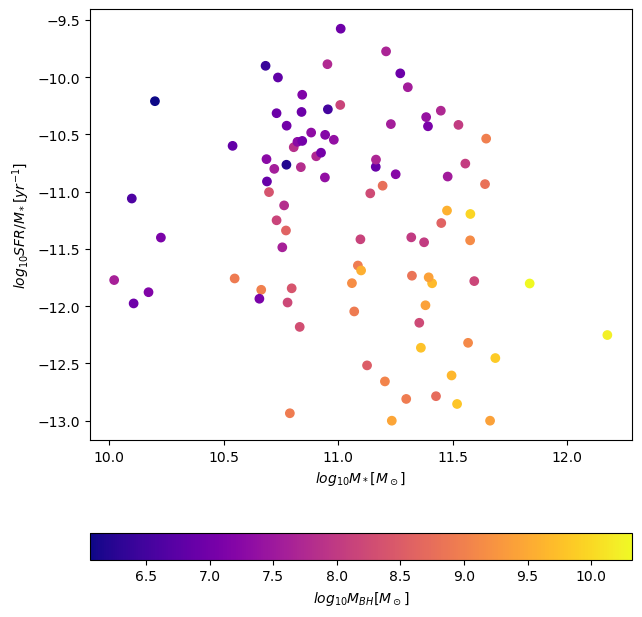

In [16]:
from matplotlib.cm import get_cmap

fig,ax=plt.subplots(figsize=(7,8))

cm = get_cmap('plasma')
sc = ax.scatter(data['M_*'], np.log10(10**data['SFR']/10**data['M_*']), c=data['M_BH'], vmin=vmn, vmax=vmx, cmap=cm)
ax.set_xlabel('$log_{10}M_* [M_\odot]$')
ax.set_ylabel('$log_{10}SFR / M_* [yr^{-1}]$')

cax = plt.colorbar(sc, orientation='horizontal')
cax.set_label('$log_{10}M_{BH} [M_\odot]$')